# Group 70: Project Proposal
## Predicting Cancer Mortality Rates Through Varying Demographic Data

### Introduction
Cancer is one of the leading causes of death in the developed world. Therefore, it is crucial that we investigate the links between cancer mortality rates and demographic data. Using a dataset imported from data.world that aggregates data from the American Community Survey, clinicaltrails.gov (a public clinical trial database), and the National Cancer Institute, we hope to predict the cancer mortality rate of a county using demographic data. Our question is the following: if given the median age and income of a county in the United States, what will be the cancer mortality rate of that county? Our claim is that a county with a higher median age and lower median income will lead to higher cancer mortality rates.

In [53]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

url <- "https://raw.githubusercontent.com/mimilht/dsci100-proj-group70/main/cancer_reg.csv"
cancer_data <- read_csv(url)
cancer_data <- cancer_data |> 
    select(medIncome, MedianAge, TARGET_deathRate) |>
    filter(na.rm = TRUE) |>
    filter(MedianAge <= 100) |>
    rename(MedianIncome = medIncome,
           DeathsPerCapita = TARGET_deathRate)
head(cancer_data)

Rows: 3047 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


medIncome,MedianAge,avgAnnCount,avgDeathsPerYear,TARGET_deathRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
61898,39.3,1397,469,164.9
48127,33.0,173,70,161.3
49348,45.0,102,50,174.7
44243,42.8,427,202,194.8
49955,48.3,57,26,144.4
52313,45.4,428,152,176.0


In [54]:
cancer_split <- initial_split(cancer_data, prop = 0.75, strata = TARGET_deathRate)
cancer_training <- training(cancer_split)
cancer_test <- testing(cancer_split)

medIncome,MedianAge,avgAnnCount,avgDeathsPerYear,TARGET_deathRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
125635,65.3,24965,9445,362.8


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



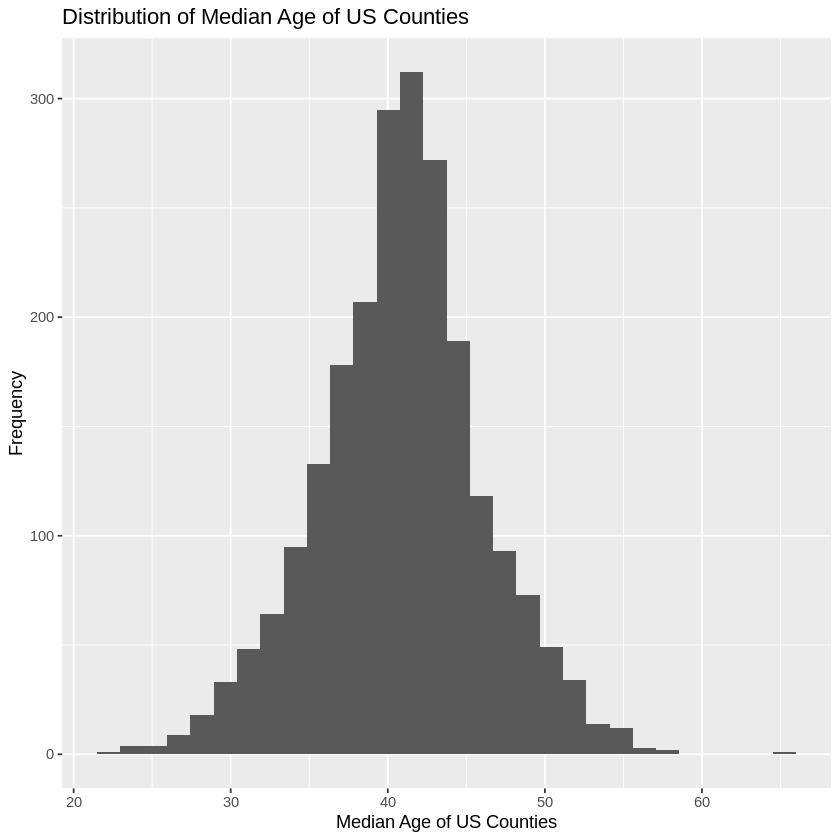

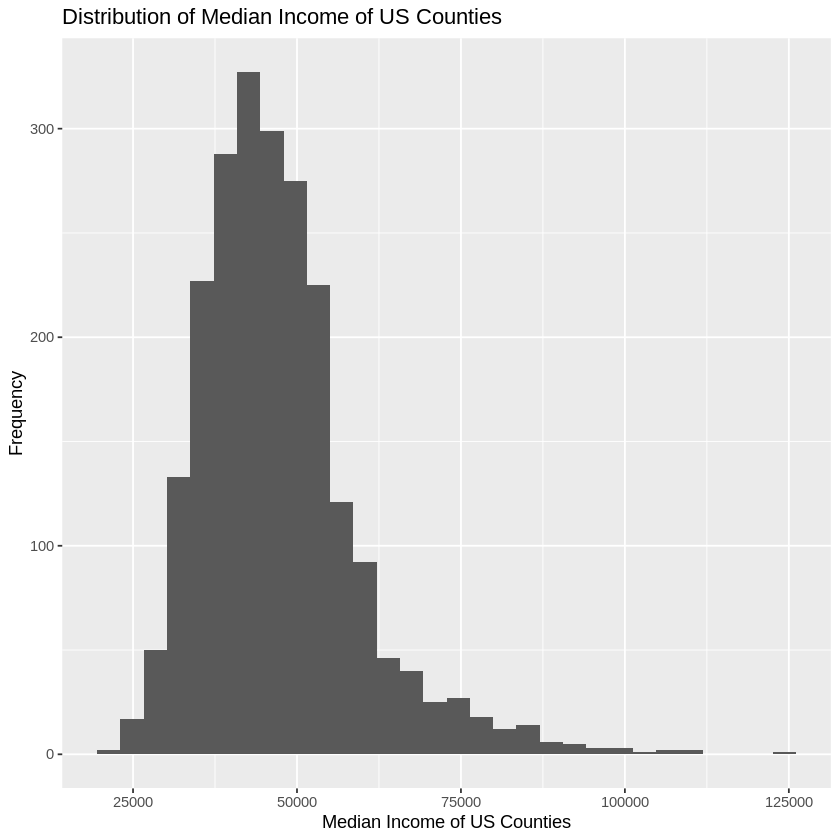

In [55]:
cancer_plot_age <- ggplot(cancer_training, aes(x = MedianAge)) +
    geom_histogram() +
    labs(x = "Median Age of US Counties", y = "Frequency") +
    ggtitle("Distribution of Median Age of US Counties")
cancer_plot_income <- ggplot(cancer_training, aes(x = medIncome)) +
    geom_histogram() +
    labs(x = "Median Income of US Counties", y = "Frequency") +
    ggtitle("Distribution of Median Income of US Counties")
cancer_plot_age
cancer_plot_income

### METHOD:

To prepare our data for analysis, we started out with downloading the dataset from the web and publishing the data on our group GitHub. We then pulled the dataset and read it on Jupyter using a URL.

Then we decided to select and filter out the columns that are required for our analysis and decided to leave the rest out. We agreed to select the Median_Age and Median_Income columns as predictors in our research. We filtered our data to only contain observations of counties with median ages less than 100 to sieve out faulty and inaccurate data. We also removed cells that have missing data (NA). We also changed the column names to make it more human readable and easier to interpret.

The dataset required minimal cleaning as the data was in a relatively tidy format, and there wasn’t any metadata attached in the file nor was there any mismatch of rows and columns.

We are using median income/age to predict cancer mortality (average death per year). We hope to analyze our data using a regression model, specifically linear regression. However, if linear regression proves to be inappropriate for predicting the mortality rate, we will consider exploring the use of a KNN regression model.
